In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Data Preparing**

In [3]:
data = pd.read_csv('yillara gore il nufuslari2000-2008.csv')

In [4]:
data = data.iloc[10,:]
data = pd.DataFrame(data)

In [5]:
data = data.rename(columns={10: 'Antalya'})
data = data.drop('Yıllara göre il nüfusları, 2000-2021')


In [6]:
data = data.reset_index(drop=True)
data['Yıllar'] = pd.Series(range(2000, 2000+len(data)), index=data.index)
data['Antalya'] = data['Antalya'].apply(lambda x : x.replace(' ',''))
convert_dict = {'Antalya': int}
 
data = data.astype(convert_dict)

print(data.dtypes)
data['Antalya'] = data['Antalya'].apply(lambda x : x/1000000)
data['Yıllar'] = data['Yıllar'].apply(lambda x : x-2000)


Antalya    int32
Yıllar     int64
dtype: object


In [8]:
data.head()

,Antalya,Yıllar
0,1.430539,0
1,1.480282,1
2,1.529110,2
3,1.578367,3
4,1.629338,4


In [9]:
x_train = data.iloc[:,1]
y_train = data.iloc[:,0]

In [10]:
print('Shape of x_train is: ',x_train.shape)
print('Shape of y_train is: ',y_train.shape)
print('Number of trainin examples (m): ',len(x_train))

Shape of x_train is:  (22,)
Shape of y_train is:  (22,)
Number of trainin examples (m):  22


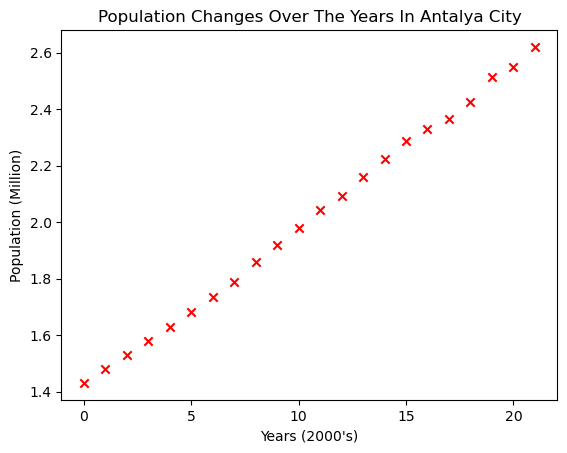

<Figure size 2100x1500 with 0 Axes>

In [11]:
# Create a scatter plot of the data. To change the markers to red "x",
plt.scatter(x_train,y_train, marker='x',c='r')

# Set the title
plt.title('Population Changes Over The Years In Antalya City')

# Set the y-axis
plt.ylabel('Population (Million)')

# Set the x-axis
plt.xlabel("Years (2000's)")


plt.figure(figsize=(7,5), dpi=300)
plt.show()

**Linear Regression Functions**

In [12]:
def compute_cost(x,y,w,b): # Squared error cost function
    m = x.shape[0] # Number of training examples
    
    total_cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        total_cost += cost
    return total_cost/(2*m)
        

In [13]:
def gradient(x,y,w,b):
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
       
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i])*x[i]
        dj_db += (f_wb - y[i])
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw,dj_db

In [14]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    
    # Number of training examples
    m = x.shape[0] 
    
    # Store cost J and w each iterations
    J_history = []
    w_history = []
    
    w = w_in
    b = b_in
    
    
    for i in range(num_iters):
        # Calculate gradients
        dj_dw, dj_db = gradient_function(x,y,w,b)
        
        # Update parameters simultaneously
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        # Save cost J at each iterations
        if i<100000: # Prevent ending of iterations 
            cost = cost_function(x,y,w,b)
            J_history.append(cost)
        
        # Print cost and at every iterations/10 times
        if i%(num_iters/10)== 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}  ")
            
    return w,b,J_history,w_history
    
    

In [15]:
# Setting initial values for w and b
initial_w = 0.0
initial_b = 0.0

# Setting other values
iterations = 1500
alpha = 0.01

In [16]:
w,b,J_history,w_history = gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,gradient,alpha,iterations)
print("w and b found by gradient descent: " , w, b)

Iteration    0: Cost     0.74  
Iteration  150: Cost     0.12  
Iteration  300: Cost     0.05  
Iteration  450: Cost     0.02  
Iteration  600: Cost     0.01  
Iteration  750: Cost     0.00  
Iteration  900: Cost     0.00  
Iteration 1050: Cost     0.00  
Iteration 1200: Cost     0.00  
Iteration 1350: Cost     0.00  
w and b found by gradient descent:  0.05907940071680304 1.3826375797114114


In [17]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b


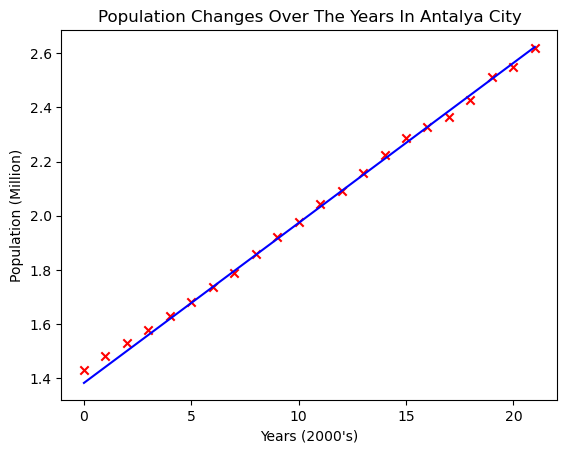

<Figure size 2100x1500 with 0 Axes>

In [18]:
# Plot the linear fit
plt.plot(x_train, predicted, c = 'b')

# Show data set at table
plt.scatter(x_train, y_train, marker ='x', c='r')

#Set the title
plt.title('Population Changes Over The Years In Antalya City')

#Set the y-axis
plt.ylabel('Population (Million)')

#Set the x-axis
plt.xlabel("Years (2000's)")


plt.figure(figsize=(7,5), dpi=300)
plt.show()

In [19]:
# A function which shows prediction of years according to algorithm
def enter_year():
    year = int(input('Please enter a year that you wonder: ' ))
    predicted_year = w * (year-2000) + b
    print(f"Population of Antalya in {year} is {predicted_year:.2f} million")

In [20]:
enter_year()

Please enter a year that you wonder: 2017
Population of Antalya in 2017 is 2.39 million
